<a href="https://colab.research.google.com/github/jsgolpof/JJOO-Pandas/blob/main/JJOO_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autor: Joaquín Sánchez García
## Fecha: 18/02/2022
## Proyecto: ETL datasets JJOO

> Ficheros (extraídos de Kaggle)

  - athlete_events.csv

> Ficheros soporte:

   - athlete_events_data_dictionary.csv

   - country_definitions.csv

   - country_definitions_data_dictionary.csv


In [59]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np

# Asignamos a jjoo el fichero en modo lectura
jjoo = pd.read_csv('athlete_events.csv', sep = ',')

## EDA PART 1

> Vemos estado de los datos

In [60]:
jjoo.head(2000)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1103,Muhammad Afzal,M,21.0,184.0,69.0,Pakistan,PAK,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 200 metres,NaN
1996,1103,Muhammad Afzal,M,21.0,184.0,69.0,Pakistan,PAK,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
1997,1104,Muhammad Afzal Manna,M,25.0,173.0,76.0,Pakistan,PAK,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Silver
1998,1105,Mirza Najib Aga,M,19.0,NaN,NaN,India,IND,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Half-Lightweight,NaN


In [61]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


> Se aprecian NaN en los campos Age, Height, Weight y Medal.

> Probablemente de estos campos, sólo usaremos "Medal"

In [62]:
numreg = jjoo.ID.value_counts().count() # cuenta distintos
numreg # Muestra lo almacenado

135571

## EDA PART 2 (Data Wrangling)

> Reemplazamos en el campo Medal
  - los nulos por 0
  - Creamos campo MedalNum codificando el tipo de medalla por número de 0 a 3
  - Creamos campo MedalBol codificando la consecución de medalla por booleano 0 o 1

In [63]:
jjoo = jjoo.fillna(0)

In [64]:
jjoo['MedalNum'] = jjoo['Medal'].map({'Gold':3,'Silver':2,'Bronze':1, 0:0}, na_action=None)
jjoo['MedalBool'] = jjoo['Medal'].map({'Gold':1,'Silver':1,'Bronze':1, 0:0}, na_action=None)

jjoo.head(2000)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalNum,MedalBool
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,3,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1103,Muhammad Afzal,M,21.0,184.0,69.0,Pakistan,PAK,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 200 metres,0,0,0
1996,1103,Muhammad Afzal,M,21.0,184.0,69.0,Pakistan,PAK,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 4 x 400 metres Relay,0,0,0
1997,1104,Muhammad Afzal Manna,M,25.0,173.0,76.0,Pakistan,PAK,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Silver,2,1
1998,1105,Mirza Najib Aga,M,19.0,0.0,0.0,India,IND,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Half-Lightweight,0,0,0


## EDA PART 3 (Visualization)

> Obtenemos varias gráficas útiles de visualización de datos

In [65]:
# Creamos dataframe temporal para mostrar gráfica por sexos
jjootab1 = jjoo.iloc[:, [2,16]]
jjootab1.head(2000)

,Sex,MedalBool
0,M,0
1,M,0
2,M,0
3,M,1
4,F,0
...,...,...
1995,M,0
1996,M,0
1997,M,1
1998,M,0


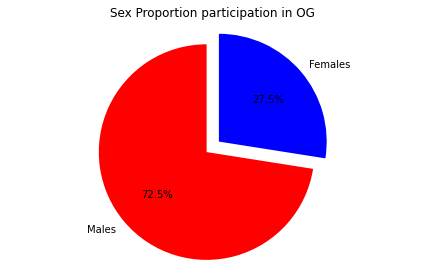

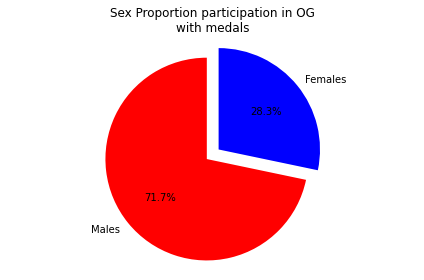

In [81]:
#jjootab1 = jjoo.DataFrame(data)

import matplotlib.pyplot as plt

# sum the instances of males and females
males = (jjootab1['Sex'] == 'M').sum()
females = (jjootab1['Sex'] == 'F').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['Red','blue'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion participation in OG")

# View the plot
plt.tight_layout()
plt.show()

# Misma gráfica pero con aquellos que consiguieron medalla

jjootab2 = jjoo.iloc[:, [2,16]]
jjootab2 = jjootab2[jjootab2["MedalBool"] == 1]

# sum the instances of males and females
males = (jjootab2['Sex'] == 'M').sum()
females = (jjootab2['Sex'] == 'F').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['Red','blue'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion participation in OG\nwith medals")

# View the plot
plt.tight_layout()
plt.show()

In [122]:
#Obtenemos los 10 atletas con mayo número de medallas
jjooTab3 = jjoo.iloc[:, [1,16]]
jjooTab3 = jjooTab3[jjooTab3['MedalBool'] == 1]
jjooTab3 = jjooTab3.groupby(by=['Name']).agg({'MedalBool':'sum'})
jjooTab3 = jjooTab3.sort_values('MedalBool', ascending=False)
jjooTab3.head(10)


,MedalBool
Name,
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Borys Anfiyanovych Shakhlin,13
Takashi Ono,13
Ole Einar Bjrndalen,13
Edoardo Mangiarotti,13
Ryan Steven Lochte,12
Birgit Fischer-Schmidt,12


In [ ]:
# sort the values from the top to the least value and slice the first 5 items
df = jjooTab3
df

# create bins interval using numpy
binsVal = np.arange(0,10,1)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7baa3c0560> (for post_execute):


KeyboardInterrupt: ignored